<a href="https://colab.research.google.com/github/shsarv/ML-and-its-Application/blob/main/Loan_Repayment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Reading file

In [ ]:
df = pd.read_csv("/loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
# Consise Summery

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Here we can see that attribute purpose has object datatype. We need to deal with it.

In [ ]:
# Summery
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Checking For Null Values


In [ ]:
df.isnull().sum().sum()

0

Our DataFrame contain **Zero** Null values.
<br><br>
Now lets solve the problem with **Purpose** Attribute.

In [ ]:
# unique values in purpose attribute

df.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

It has **6 unique values**. lets convert these labels into numeric form.

### Encoding

* We will be using **Label Encoder** to convert labels available in purpose attribute.

* It will Encode purpose labels with value between 0 and n_classes-1(5).

In [ ]:
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
numeric_columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values for now
df.dropna(subset=numeric_columns, inplace=True)
z_scores = stats.zscore(df[numeric_columns])
outlier_indices = (np.abs(z_scores) > 3).any(axis=1)
outliers = df[outlier_indices]


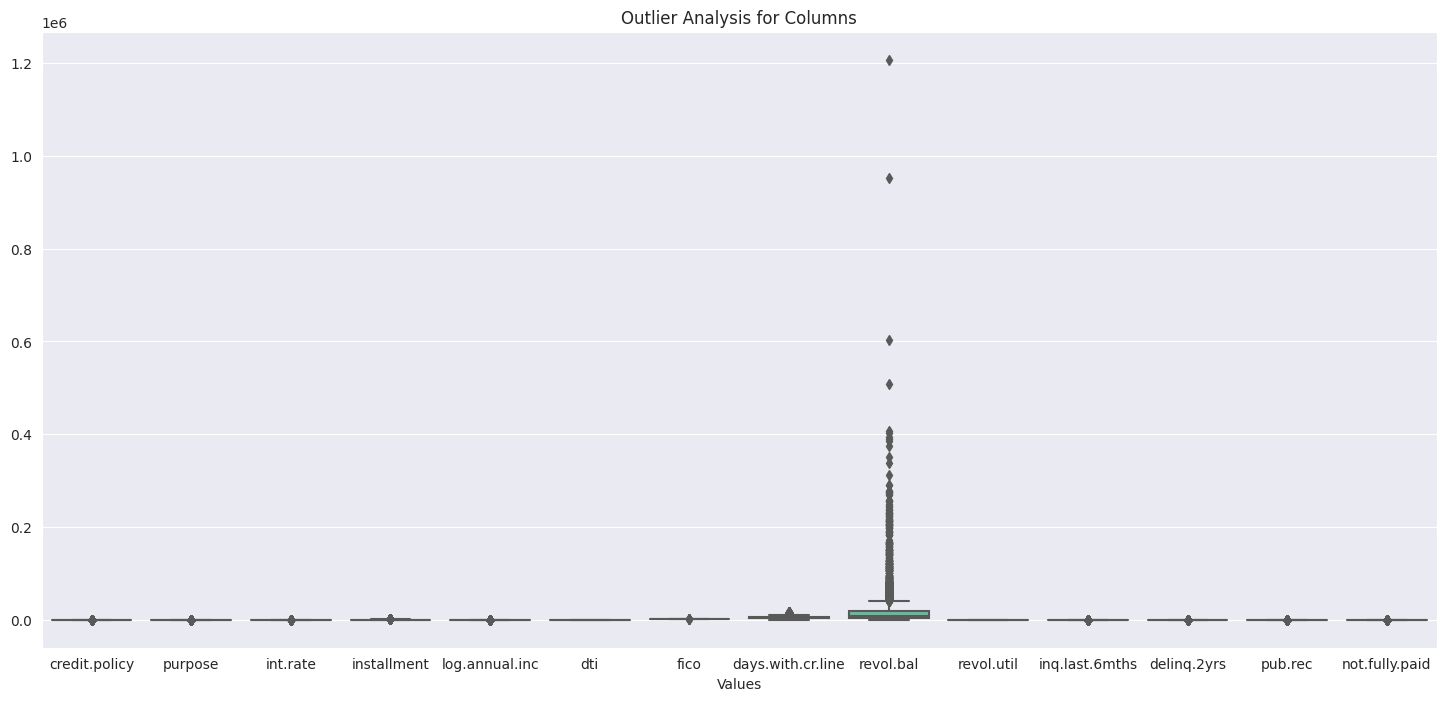

In [ ]:
plt.figure(figsize=(18, 8))
ax = sns.boxplot(data=df, orient="V", palette="Set2")  # 'orient="h"' for horizontal boxplot

# Set the title and labels
ax.set_title('Outlier Analysis for Columns')
ax.set_xlabel('Values')

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Drop the target class
X =  df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate the performance
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_logreg))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test, y_pred_logreg))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print('Test Accuracy score:', accuracy_logreg)


Confusion Matrix
 [[1605    6]
 [ 300    5]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.45      0.02      0.03       305

    accuracy                           0.84      1916
   macro avg       0.65      0.51      0.47      1916
weighted avg       0.78      0.84      0.77      1916



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8402922755741128


# Clustering

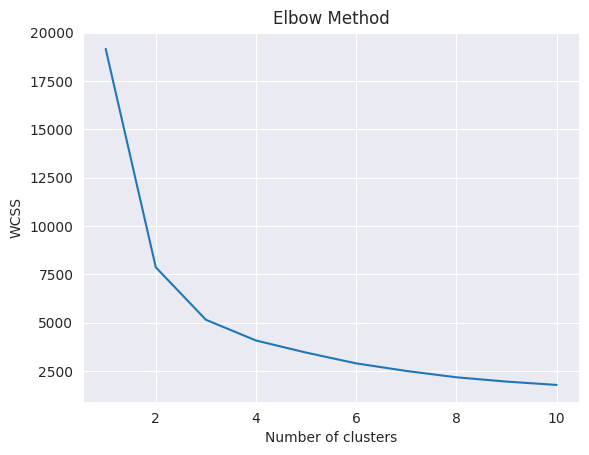

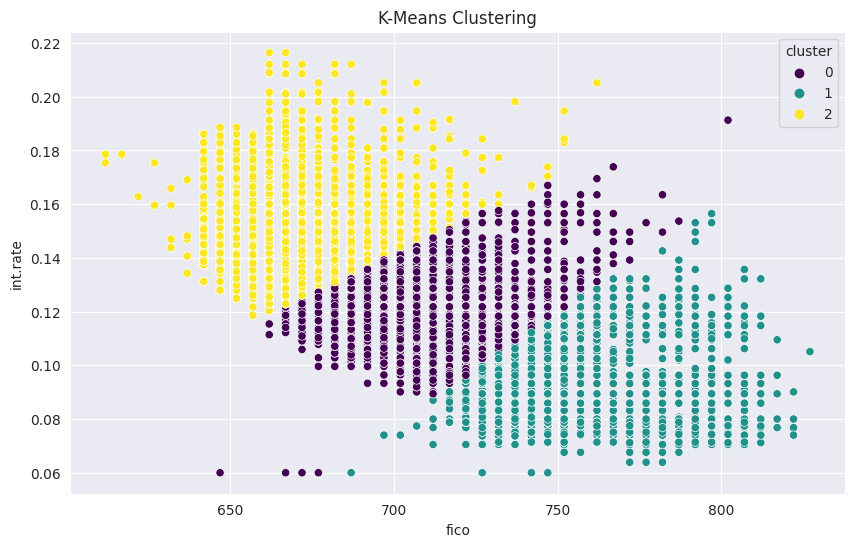

In [ ]:
from sklearn.cluster import KMeans

# Select relevant features for clustering (adjust as needed)
X_cluster = df[['fico', 'int.rate']]

# Standardize features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters
optimal_clusters = 3  # Adjust as needed

# Apply K-Means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans_optimal.fit_predict(X_cluster_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fico', y='int.rate', hue='cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()



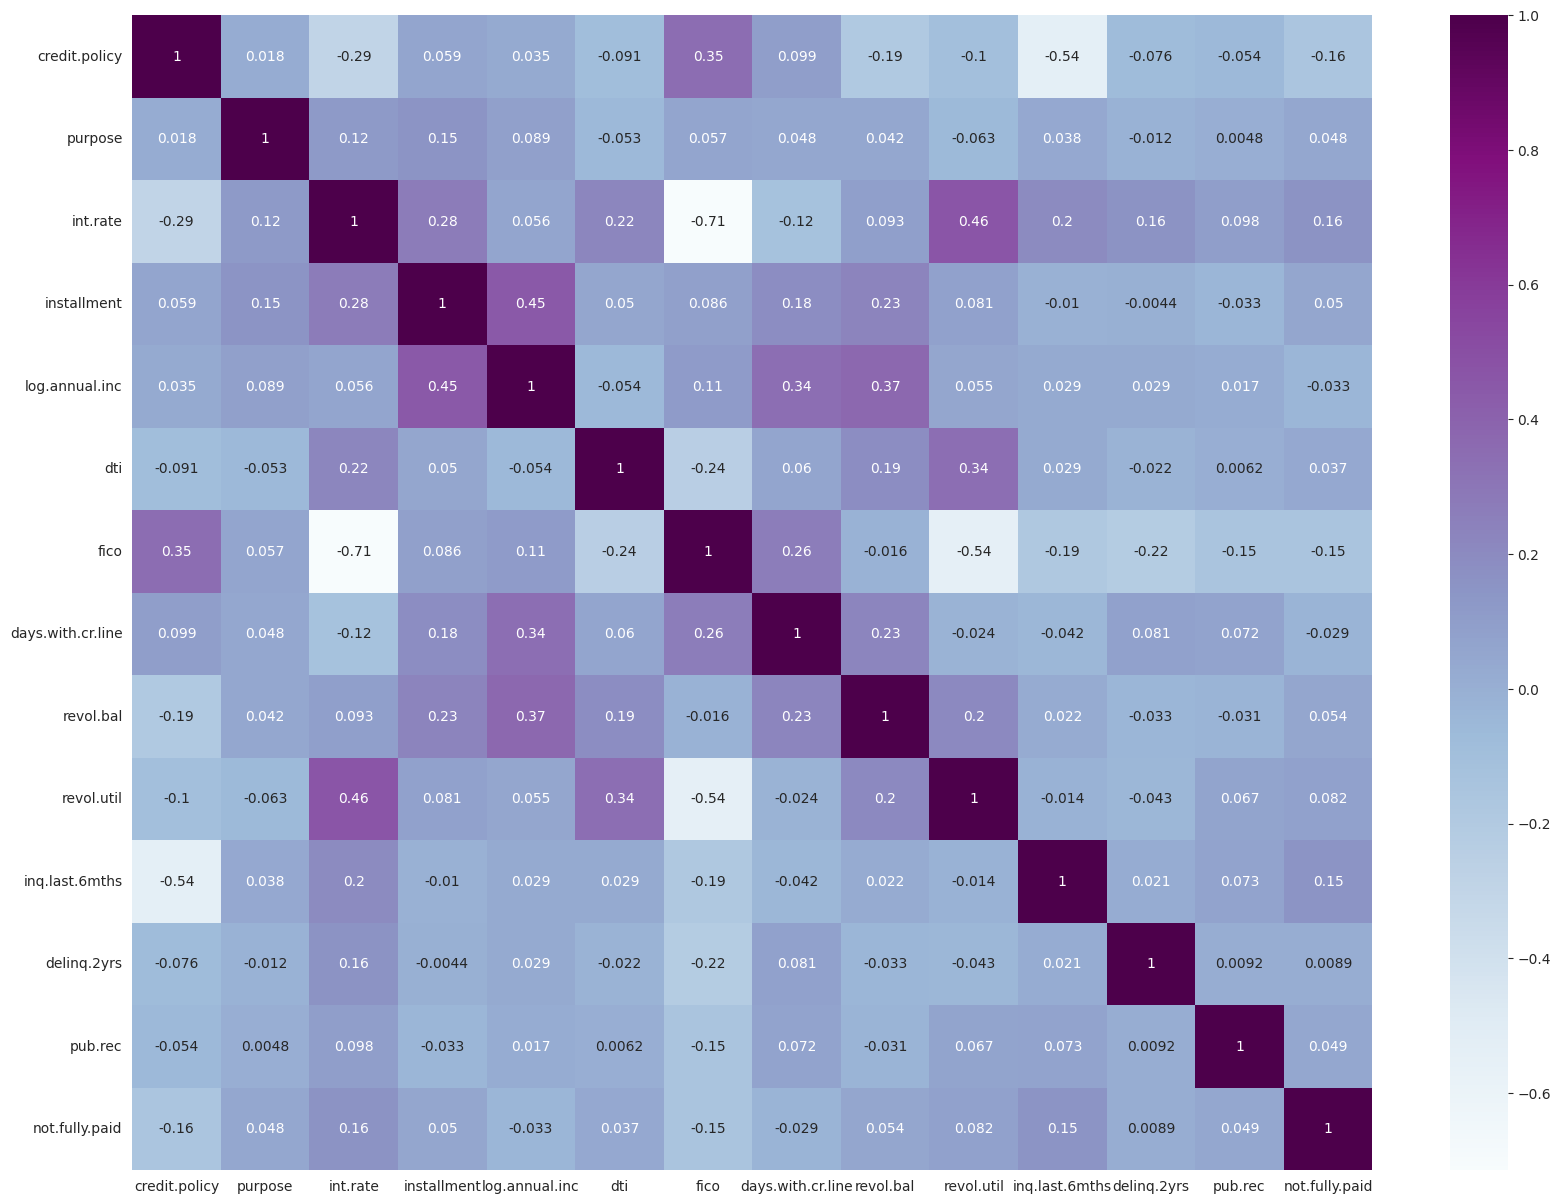

In [ ]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.show()

We can see that **init rate, credit policy, fico and inq.last.6mths** has corresponding grater impact on target class(not.gully.paid)



### Train-Test Split

Splitting the dataset for training and testing purpose.

In [ ]:
# Dropping target class

X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

# Modellng

\## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3, 4,5,6,7,8,9,10,11,13,15,20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15,
                                       20]},
             return_train_score=True, scoring='recall_weighted')

In [ ]:
grid_search.best_params_

{'max_depth': 2}

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2431    0]
 [ 443    0]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



<---------------Accuracy Scores------------------->

Train Accuracy score:  0.8374105011933174
Test Accuracy score: 0.8458594293667363


We got **Accuracy of 84.58%** using Decision Tree Classifier.

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=600)
rf_clf.fit(X_train, y_train)
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2422    9]
 [ 434    9]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8458594293667363


We got the **Accuracy of 84.7%** with random Forest Classifier

# ANN

In [ ]:
# Encode categorical features
df['purpose'] = LabelEncoder().fit_transform(df['purpose'])

# Drop the target class
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build an Artificial Neural Network (ANN) model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {accuracy[1]}")

# Predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred_nn = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluate the performance
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_nn))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test, y_pred_nn))

Epoch 1/10
192/192 - 1s - loss: 0.4479 - accuracy: 0.8354 - val_loss: 0.4265 - val_accuracy: 0.8421 - 1s/epoch - 8ms/step
Epoch 2/10
192/192 - 0s - loss: 0.4211 - accuracy: 0.8393 - val_loss: 0.4200 - val_accuracy: 0.8421 - 488ms/epoch - 3ms/step
Epoch 3/10
192/192 - 1s - loss: 0.4156 - accuracy: 0.8403 - val_loss: 0.4162 - val_accuracy: 0.8428 - 508ms/epoch - 3ms/step
Epoch 4/10
192/192 - 0s - loss: 0.4125 - accuracy: 0.8401 - val_loss: 0.4155 - val_accuracy: 0.8421 - 452ms/epoch - 2ms/step
Epoch 5/10
192/192 - 1s - loss: 0.4090 - accuracy: 0.8414 - val_loss: 0.4180 - val_accuracy: 0.8402 - 524ms/epoch - 3ms/step
Epoch 6/10
192/192 - 0s - loss: 0.4065 - accuracy: 0.8430 - val_loss: 0.4145 - val_accuracy: 0.8428 - 496ms/epoch - 3ms/step
Epoch 7/10
192/192 - 1s - loss: 0.4051 - accuracy: 0.8424 - val_loss: 0.4139 - val_accuracy: 0.8434 - 510ms/epoch - 3ms/step
Epoch 8/10
192/192 - 0s - loss: 0.4032 - accuracy: 0.8424 - val_loss: 0.4123 - val_accuracy: 0.8408 - 468ms/epoch - 2ms/step
Epo



We Found that the **Best Model for this DataSet is Random Forest with Accuracy of 85%.**